In [2]:
import pandas as pd# For data processing e.g loading csv file
import matplotlib.pyplot as plt# for data visualization
import seaborn as sns# for data visualization 

In [3]:
df=pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


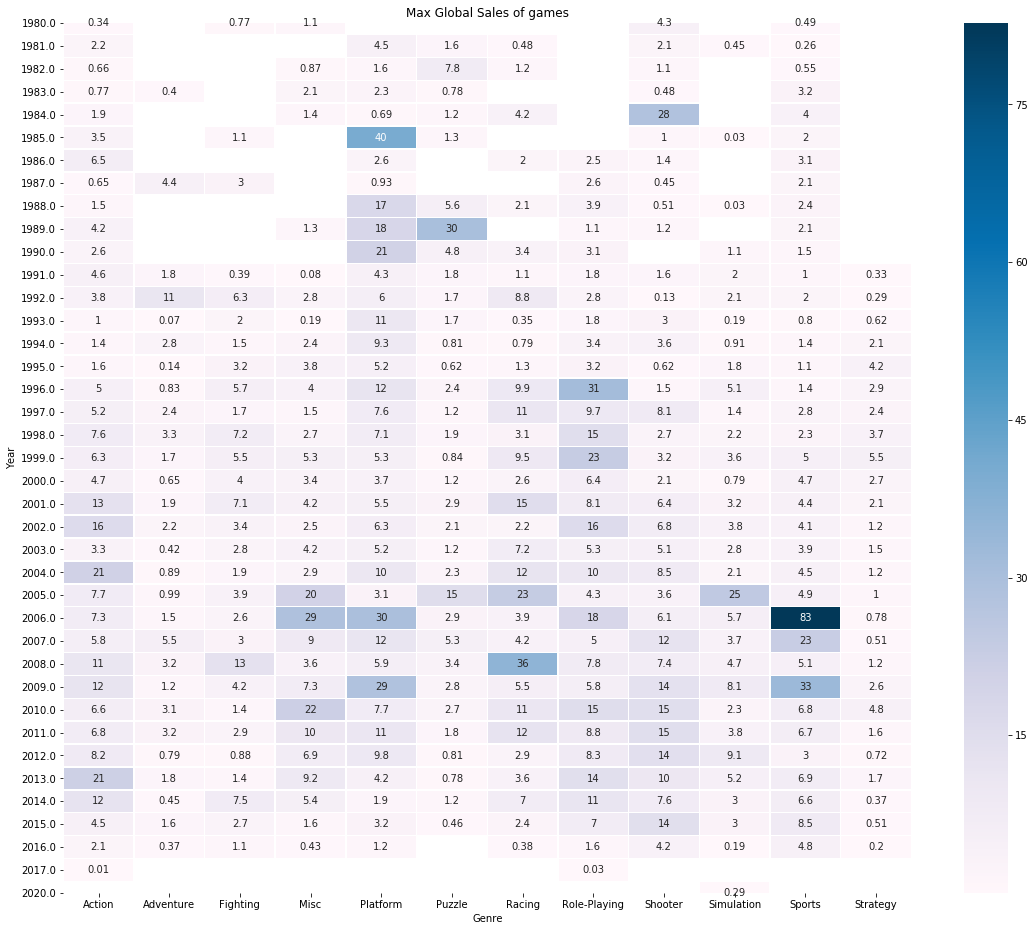

In [6]:
table_sales=pd.pivot_table(df,values=['Global_Sales'],index=['Year'],columns=['Genre'],aggfunc='max',margins=False)#arranging years 

plt.figure(figsize=(19,16))
sns.heatmap(table_sales['Global_Sales'],linewidths=.5,annot=True, vmin=0.01 ,cmap='PuBu')
plt.title('Max Global Sales of games')
plt.show()

In [9]:
def top(vgs ,n=1,columns='Global_Sales'):#creating a function top and passing arguements
    return vgs.sort_values(by=columns)[-n:]#sorting values
df.groupby(['Year'], group_keys=False).apply(top)[['Year','Name','Global_Sales','Genre','Platform','Publisher']]
     #to group columns at the top starting with year   

,Year,Name,Global_Sales,Genre,Platform,Publisher
258,1980.0,Asteroids,4.31,Shooter,2600,Atari
239,1981.0,Pitfall!,4.50,Platform,2600,Activision
89,1982.0,Pac-Man,7.81,Puzzle,2600,Atari
421,1983.0,Baseball,3.20,Sports,NES,Nintendo
9,1984.0,Duck Hunt,28.31,Shooter,NES,Nintendo
1,1985.0,Super Mario Bros.,40.24,Platform,NES,Nintendo
127,1986.0,The Legend of Zelda,6.51,Action,NES,Nintendo
251,1987.0,Zelda II: The Adventure of Link,4.38,Adventure,NES,Nintendo
22,1988.0,Super Mario Bros. 3,17.28,Platform,NES,Nintendo
5,1989.0,Tetris,30.26,Puzzle,GB,Nintendo


In [10]:
df.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False)[:40]

Name
Wii Sports                                      82.74
Grand Theft Auto V                              55.92
Super Mario Bros.                               45.31
Tetris                                          35.84
Mario Kart Wii                                  35.82
Wii Sports Resort                               33.00
Pokemon Red/Pokemon Blue                        31.37
Call of Duty: Black Ops                         31.03
Call of Duty: Modern Warfare 3                  30.83
New Super Mario Bros.                           30.01
Call of Duty: Black Ops II                      29.72
Wii Play                                        29.02
New Super Mario Bros. Wii                       28.62
Duck Hunt                                       28.31
Call of Duty: Ghosts                            27.38
Super Mario World                               26.07
Call of Duty: Black Ops 3                       25.32
Call of Duty: Modern Warfare 2                  25.09
Nintendogs             

In [11]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
df.drop('NA_Sales', axis=1,inplace=True)#to drop a column
#use drop () function in bracket specify the column to be dropped and axis

In [23]:
df.head()#function to return the dataframe

,Rank,Name,Platform,Year,Genre,EU_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,29.02,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,3.58,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,12.88,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,11.01,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,8.89,31.37


In [24]:
#Size of the dataframe
len(df)

16598

In [25]:
#to explore data
df.describe()

,Rank,Year,EU_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.146652,0.537441
std,4791.853933,5.828981,0.505351,1.555028
min,1.000000,1980.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.020000,0.170000
75%,12449.750000,2010.000000,0.110000,0.470000
max,16600.000000,2020.000000,29.020000,82.740000


In [26]:
#how to replace or change the value of a string of a column to an int
df['Platform']=df['Platform'].map({'Wii':1,'NES':0})
df.head()

,Rank,Name,Platform,Year,Genre,EU_Sales,Global_Sales
0,1,Wii Sports,1.0,2006.0,Sports,29.02,82.74
1,2,Super Mario Bros.,0.0,1985.0,Platform,3.58,40.24
2,3,Mario Kart Wii,1.0,2008.0,Racing,12.88,35.82
3,4,Wii Sports Resort,1.0,2009.0,Sports,11.01,33.00
4,5,Pokemon Red/Pokemon Blue,NaN,1996.0,Role-Playing,8.89,31.37


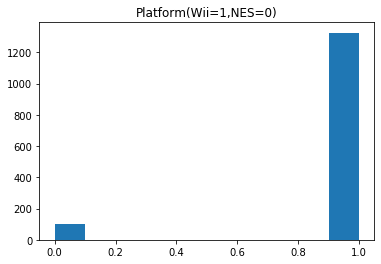

In [29]:
plt.hist(df['Platform'])#Drawing a histogram
plt.title('Platform(Wii=1,NES=0)')
plt.show()

In [30]:
df=pd.read_csv('vgsales.csv')
df#reloading initial dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
